In [ ]:
import pandas as pd

In [ ]:
# importing the train and test data dataset from file
train_val_csv = pd.read_csv('UNSW_NB15_training-set.csv')
test_csv = pd.read_csv('UNSW_NB15_testing-set.csv')

In [ ]:
train_val_csv=train_val_csv.drop(columns=['id', 'proto', 'service', 'state'])
test_csv=test_csv.drop(columns=['id', 'proto', 'service', 'state'])

# train_val_csv=train_val_csv.drop(columns=['id'])
# test_csv=test_csv.drop(columns=['id'])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train,val = train_test_split(train_val_csv, test_size=0.2, random_state = 1)
train_val_csv = train

In [ ]:
train_val_csv.head(n=5)

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
20807,0.000005,2,0,114,0,200000.005100,254,0,9.120000e+07,0.000000,...,16,35,0,0,0,17,35,0,Generic,1
61187,0.000005,2,0,114,0,200000.005100,254,0,9.120000e+07,0.000000,...,3,3,0,0,0,3,10,0,Generic,1
3340,0.704410,8,8,364,1934,21.294416,62,252,3.622890e+03,19227.437500,...,1,1,0,0,0,2,1,0,Exploits,1
45524,1.457674,60,16,68193,698,51.451833,254,252,3.680219e+05,3594.768066,...,1,1,0,0,0,1,2,0,Fuzzers,1
10583,0.472600,10,6,540,268,31.739314,254,252,8.226830e+03,3791.790039,...,1,1,0,0,0,2,1,0,Exploits,1


In [ ]:
train_val_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65865 entries, 20807 to 77708
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dur                65865 non-null  float64
 1   spkts              65865 non-null  int64  
 2   dpkts              65865 non-null  int64  
 3   sbytes             65865 non-null  int64  
 4   dbytes             65865 non-null  int64  
 5   rate               65865 non-null  float64
 6   sttl               65865 non-null  int64  
 7   dttl               65865 non-null  int64  
 8   sload              65865 non-null  float64
 9   dload              65865 non-null  float64
 10  sloss              65865 non-null  int64  
 11  dloss              65865 non-null  int64  
 12  sinpkt             65865 non-null  float64
 13  dinpkt             65865 non-null  float64
 14  sjit               65865 non-null  float64
 15  djit               65865 non-null  float64
 16  swin              

In [ ]:
train_val_csv.isnull().sum()

dur                  0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat           0
label                0
dtype: int64

In [ ]:
train_val_csv.shape

(65865, 41)

In [ ]:

data_to_use = train_val_csv.dropna()

# Shape of the data: we could see that the number of rows remains the same as no null values were reported
data_to_use.shape

(65865, 41)

In [ ]:
X = data_to_use.drop(axis=1, columns=['attack_cat']) # X is a dataframe
X = X.drop(axis=1, columns=['label'])


y1 = data_to_use['attack_cat'].values # y is an array
y2 = data_to_use['label'].values

In [ ]:
unique_values = np.unique(y1)
print(unique_values)

['Analysis' 'Backdoor' 'DoS' 'Exploits' 'Fuzzers' 'Generic' 'Normal'
 'Reconnaissance' 'Shellcode' 'Worms']


In [ ]:
# Calculate Y2 ratio
def data_ratio(y2):
    '''
    Calculate Y2's ratio
    '''
    unique, count = np.unique(y2, return_counts=True)
    ratio = round(count[0]/count[1], 1)
    return f'{ratio}:1 ({count[0]}/{count[1]})'

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# sklearn: data preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler

# sklearn: train model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, classification_report

# sklearn classifiers

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn import datasets, ensemble, model_selection
from sklearn.ensemble import RandomForestClassifier

from sklearn.neural_network import MLPClassifier

The class ratio for the original data: 1.2:1 (557/465)


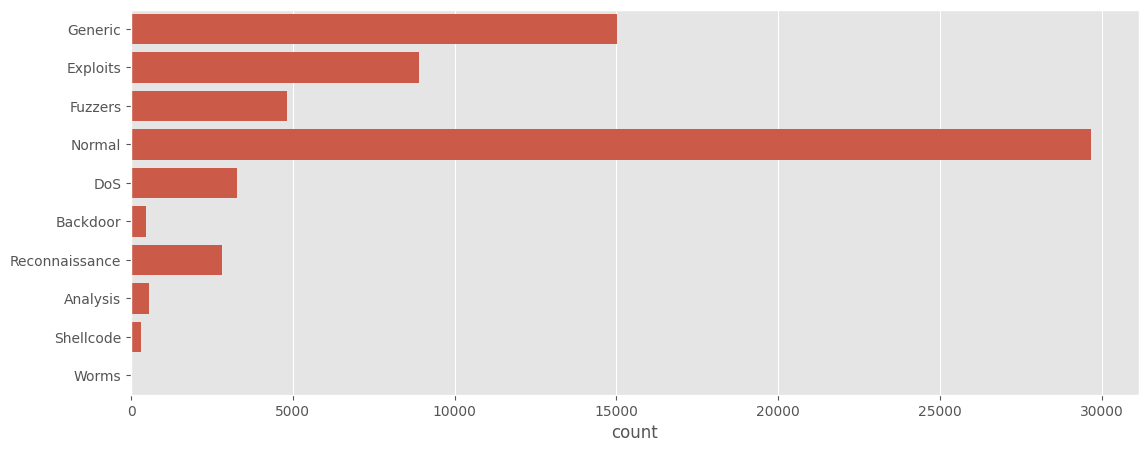

In [ ]:
print('The class ratio for the original data:', data_ratio(y1))
plt.figure(figsize=(13,5))
sns.countplot(y1,label="Sum")
plt.show()

# print('The class ratio for the original data:', data_ratio(y2))
# sns.countplot(y2,label="Sum")
# plt.show()

In [ ]:
# test_data = pd.read_csv('UNSW_NB15_testing.csv')
X_test = test_csv.drop(axis=1, columns=['attack_cat']) # X_test is a dataframe
X_test = X_test.drop(axis=1, columns=['label'])


y1_test = test_csv['attack_cat'].values # y is an array
y2_test = test_csv['label'].values

In [ ]:
X_train = X
y1_train = y1
y2_train = y2

In [ ]:
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'bool']).columns

In [ ]:
numerical_cols

Index(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl',
       'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit',
       'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean',
       'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports'],
      dtype='object')

In [ ]:
categorical_cols


Index([], dtype='object')

In [ ]:
# define the transformation methods for the columns
t = [('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
    ('scale', MinMaxScaler(), numerical_cols)]

col_trans = ColumnTransformer(transformers=t)

# fit the transformation on training data
col_trans.fit(X_train)

ColumnTransformer(transformers=[('ohe',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 Index([], dtype='object')),
                                ('scale', MinMaxScaler(),
                                 Index(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl',
       'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit',
       'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean',
       'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports'],
      dtype='object'))])

In [ ]:
X_train_transform = col_trans.transform(X_train)

In [ ]:
# print(X_train_transform)

In [ ]:
print(X_test.columns)

Index(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl',
       'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit',
       'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean',
       'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports'],
      dtype='object')


In [ ]:
X_test_transform = col_trans.transform(X_test)

In [ ]:
X_train_transform.shape

(65865, 39)

In [ ]:
X_test_transform.shape

(175341, 39)

In [ ]:
pd.unique(y1)

array(['Generic', 'Exploits', 'Fuzzers', 'Normal', 'DoS', 'Backdoor',
       'Reconnaissance', 'Analysis', 'Shellcode', 'Worms'], dtype=object)

In [ ]:
pd.unique(y2)

array([1, 0])

In [ ]:
target_trans = LabelEncoder()
target_trans.fit(y1_train)

LabelEncoder()

In [ ]:
y1_train_transform = target_trans.transform(y1_train)
y1_test_transform = target_trans.transform(y1_test)

In [ ]:
y1_train_transform

array([5, 5, 3, ..., 0, 7, 6])

In [ ]:
target_trans = LabelEncoder()
target_trans.fit(y2_train)
y2_train_transform = target_trans.transform(y2_train)
y2_test_transform = target_trans.transform(y2_test)

In [ ]:
y2_train_transform

array([1, 1, 1, ..., 1, 1, 0])

Decision Tree


In [ ]:
# DTclf = tree.DecisionTreeClassifier()
# DTclf.fit(X_train_transform, y2_train_transform)

In [ ]:
# feature_names = np.array(numerical_cols)
# feature_names

In [ ]:
# importances = DTclf.feature_importances_
# indices = np.argsort(importances)
# features = np.array(numerical_cols)
# plt.title('Feature Importances of Decision Tree Classifier')
# count = 30 # top # importance
# plt.barh(range(count), importances[indices][len(indices)-count:], color='g', align='center')
# # plt.yticks(range(count), [features[i] for i in indices[len(indices)-count:]])
# plt.xlabel('Relative Importance')
# plt.show()

In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot

In [ ]:
model = XGBClassifier()
model.fit(X_train_transform, y1_train_transform)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
from xgboost import plot_importance
from matplotlib import pyplot

In [ ]:
# f =(X_train.columns.tolist())
# print(f)

In [ ]:
features = np.array(X_train.columns.tolist())
print(features.shape)

(39,)


In [ ]:
# importances = model.feature_importances_
# indices = np.argsort(importances)

# features = np.array(numerical_cols)
# plt.title('Feature Importances of XGBoosting Classifier')
# count = 20 # top # importance
# plt.barh(range(count), importances[indices][len(indices)-count:], color='g', align='center')
# plt.yticks(range(count), [features[i] for i in indices[len(indices)-count:]])
# plt.xlabel('Relative Importance')
# plt.show()

Decision Tree Classifer

In [ ]:
# Create Decision Tree classifer object
DTclf = DecisionTreeClassifier()

# Train Decision Tree Classifer
DTclf = DTclf.fit(X_train_transform, y1_train_transform)

#Predict the response for test dataset
y_pred = DTclf.predict(X_test_transform)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, average_precision_score, f1_score

In [ ]:
def calculate_classification_metrics(y_true, y_pred):
    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)

    # Calculate precision
    precision = precision_score(y_true, y_pred, average='weighted')

    # Calculate recall
    recall = recall_score(y_true, y_pred, average='weighted')

    # # Calculate AUC
    # auc = roc_auc_score(y_true, y_score, average='macro', multi_class='ovr')

    # # Calculate PR AUC
    # prc = average_precision_score(y_true, y_score, average='macro', multi_class='ovr')

    # Calculate f1 score
    f1 = f1_score(y_true, y_pred, average='weighted')

    # Calculate macro F1 score
    macro_f1_score = f1_score(y_true, y_pred, average='macro')

    return accuracy, precision, recall, f1, macro_f1_score

In [ ]:
# from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
# # Model Accuracy, how often is the classifier correct?
# print("Accuracy:",metrics.accuracy_score(y2_test_transform, y_pred))

# report=metrics.classification_report(y2_test_transform,y_pred)

# DTclf_name=['Decision Tree Classifer','RegLog']

# print('Reporting for %s:'%DTclf_name)

# print(report)

In [ ]:
# Calculate accuracy
accuracy, precision, recall, f1, macro_f1 = calculate_classification_metrics(y1_test_transform, y_pred)
print("For Training Dataset: ")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"AUC: {auc}")
print(f"PRC: {prc}")
print(f"f1: {f1}")
print(f"macro_f1: {macro_f1}")

print("-----------------")

For Training Dataset: 
Accuracy: 0.7319451811042483
Precision: 0.7187236781813504
Recall: 0.7319451811042483
AUC: <function auc at 0x7ba43e637910>
PRC: 0.9409539188355202
f1: 0.7021532433247483
macro_f1: 0.4531393867202359
-----------------


**For Validation**

In [ ]:
from numpy import sort

In [ ]:
thresholds = sort(model.feature_importances_)

In [ ]:
print(thresholds)

[0.         0.         0.00142987 0.0014813  0.00153394 0.00168531
 0.00177807 0.00190507 0.00252702 0.00284835 0.00354657 0.00366203
 0.00382401 0.00388807 0.00392104 0.00405233 0.00416961 0.00441843
 0.00447133 0.00539402 0.0057178  0.00574889 0.00596476 0.00789205
 0.00846304 0.00907758 0.00959851 0.01298803 0.01523535 0.02192254
 0.02348764 0.02919255 0.03155738 0.0319967  0.04638333 0.08251331
 0.08698925 0.17850108 0.3302337 ]


In [ ]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
selection = SelectFromModel(model, threshold=0.0057178, prefit=True)
# print(X_train_transform[0])
select_X_train = selection.transform(X_train_transform)
# print(select_X_train[0])
select_X_test = selection.transform(X_test_transform)
print(select_X_train.shape, select_X_test.shape)

(65865, 16) (175341, 16)


After feature selection

In [ ]:
# Create Decision Tree classifer object
selectDT = DecisionTreeClassifier()

# Train Decision Tree Classifer
selectDT = selectDT.fit(select_X_train, y1_train_transform)

#Predict the response for test dataset
y_pred = selectDT.predict(select_X_test)

In [ ]:
accuracy, precision, recall, f1, macro_f1 = calculate_classification_metrics(y1_test_transform, y_pred)
print("For Training Dataset: ")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"f1: {f1}")
print(f"macro_f1: {macro_f1}")

print("-----------------")

For Training Dataset: 
Accuracy: 0.7472810124272132
Precision: 0.7493996426565898
Recall: 0.7472810124272132
f1: 0.7252074193412986
macro_f1: 0.4945356150986422
-----------------


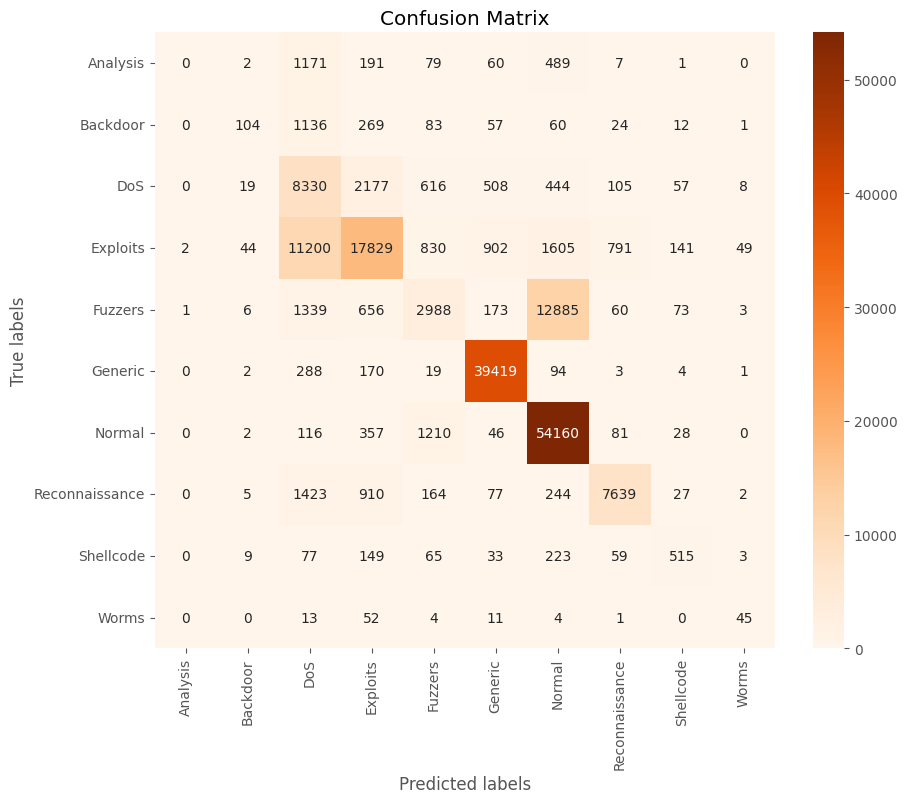

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Example true labels and predicted labels
# Assuming y1_test_transform contains the true labels and y_pred contains the predicted labels
# y1_test_transform = ...
# y_pred = ...

# Compute confusion matrix
cm = confusion_matrix(y1_test_transform, y_pred)

# Define class labels
classes = ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Normal', 'Reconnaissance', 'Shellcode', 'Worms']

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
